## Reto 2: Error estándar e intervalos de confianza

### 1. Objetivos:
    - Aprender a calcular e interpretar errores estándar e intervalos de confianza

---
    
### 2. Desarrollo:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para este Reto de nuevo podrás elegir el dataset de tu agrado. Elige un dataset o una variable distinta que la del Reto anterior. Recuerda ordenar y explicar bien tu análisis para que sea comprensible para los demás. Una vez que hayas elegido un dataset y una variable que te parezcan interesantes, realiza los siguientes pasos:

1. Primero explora tu variable con los métodos tradicionales: estimados de locación y dispersión, histograma, etc.
2. Ahora usa la técnica de bootstrap para obtener la distribución muestral de la media y de la mediana de tu variable. Elige los parámetros más adecuados para el bootstrap basándote en los resultados obtenidos en el Reto anterior.
3. Grafica la distribución muestral de la media y la mediana.
4. Ahora, obtén el error estándar de ambas medidas estadísticas. Utiliza el mínimo, el máximo y el rango para contextualizar tu error estándar y saber qué tan grande o pequeño es.
5. Ahora, para cada medida estadística obtén los intervalos de confianza de 90%, 95% y 99%. Compara los resultados.
6. Comparte tus hallazgos con tus compañeros.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from google.colab import userdata

In [ ]:
ruta = userdata.get('ruta')

df = pd.read_csv(ruta + 'us_unemployment-oct_2012.csv', index_col=0)

df.head()

,Unemployment
State,
AL,7.1
AK,6.8
AZ,8.1
AR,7.2
CA,10.1


In [ ]:
columna_desempleo = df['Unemployment']

In [ ]:
# Calcular estimados de localización
media = columna_desempleo.mean()
mediana = columna_desempleo.median()

print(f"Media: {media}")
print(f"Mediana: {mediana}")

Media: 7.146
Mediana: 7.1


In [ ]:
# Calcular estimados de dispersión
desviacion_estandar = columna_desempleo.std()
q1 = columna_desempleo.quantile(0.25)
q3 = columna_desempleo.quantile(0.75)
iqr = q3 - q1

print(f"Desviación estándar: {desviacion_estandar}")
print(f"Rango intercuartílico (IQR): {iqr}")

Desviación estándar: 1.665154279792177
Rango intercuartílico (IQR): 2.6000000000000005


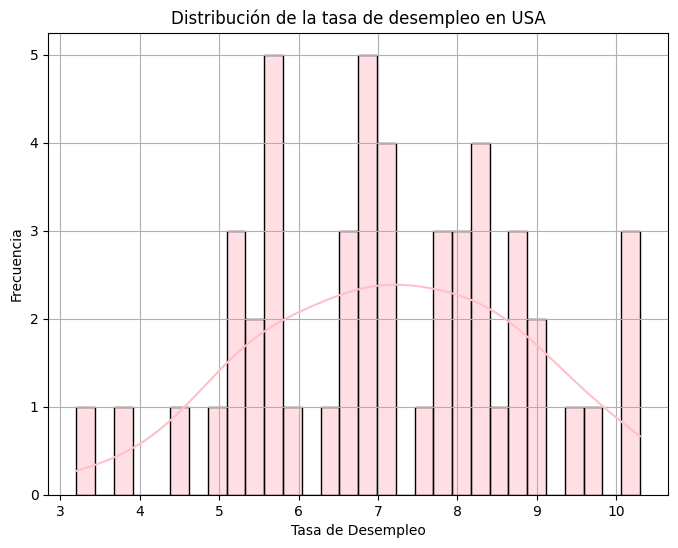

In [ ]:
# Graficar histograma

plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.histplot(columna_desempleo, bins=30, kde=True, color='pink')  # Histograma con curva de densidad
plt.title('Distribución de la tasa de desempleo en USA')  # Título
plt.xlabel('Tasa de Desempleo')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y
plt.grid(True)  # Mostrar cuadrícula
plt.show()

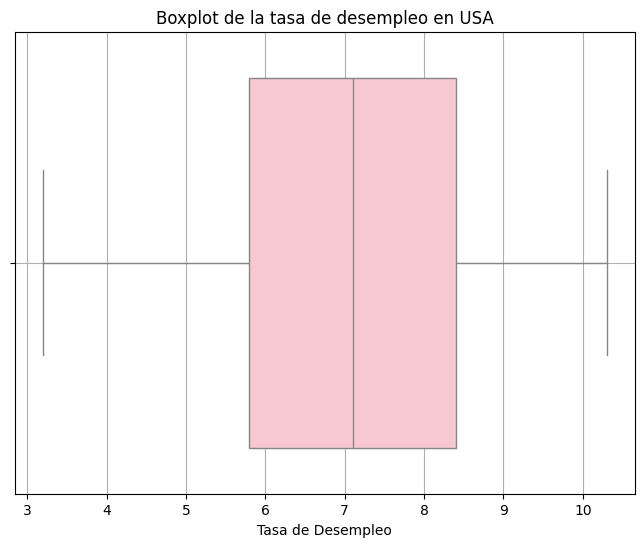

In [ ]:
# Graficas Boxplot

plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.boxplot(x=columna_desempleo, color='pink')  # Boxplot
plt.title('Boxplot de la tasa de desempleo en USA')  # Título
plt.xlabel('Tasa de Desempleo')  # Etiqueta del eje X
plt.grid(True)  # Mostrar cuadrícula
plt.show()

In [ ]:
# Aplicar Bootstrap para la media y mediana

n_remuestreos = 10000

bootstrap_medias = [np.mean(np.random.choice(columna_desempleo, size=len(columna_desempleo), replace=True))
                    for _ in range(n_remuestreos)]
bootstrap_medianas = [np.median(np.random.choice(columna_desempleo, size=len(columna_desempleo), replace=True))
                      for _ in range(n_remuestreos)]

In [ ]:
# Calcular el Error Estándar para la media y la mediana

SE_media = np.std(bootstrap_medias, ddof=1)
SE_mediana = np.std(bootstrap_medianas, ddof=1)

In [ ]:
# Generar Intervalos de Confianza
def calcular_ic(distribucion, confianza):
    z = (1 + confianza) / 2
    percentiles = np.percentile(distribucion, [(1 - confianza) * 100, z * 100])
    return percentiles

IC_90_media = calcular_ic(bootstrap_medias, 0.90)
IC_95_media = calcular_ic(bootstrap_medias, 0.95)
IC_99_media = calcular_ic(bootstrap_medias, 0.99)

IC_90_mediana = calcular_ic(bootstrap_medianas, 0.90)
IC_95_mediana = calcular_ic(bootstrap_medianas, 0.95)
IC_99_mediana = calcular_ic(bootstrap_medianas, 0.99)

In [ ]:
# Mostrar resultados en tabla
resultados_ic = pd.DataFrame({
    "Métrica": ["Media", "Mediana"],
    "Error estándar": [SE_media, SE_mediana],
    "IC 90% inferior": [IC_90_media[0], IC_90_mediana[0]],
    "IC 90% superior": [IC_90_media[1], IC_90_mediana[1]],
    "IC 95% inferior": [IC_95_media[0], IC_95_mediana[0]],
    "IC 95% superior": [IC_95_media[1], IC_95_mediana[1]],
    "IC 99% inferior": [IC_99_media[0], IC_99_mediana[0]],
    "IC 99% superior": [IC_99_media[1], IC_99_mediana[1]],
})

print(f"Resultados de bootstrap:")
print(resultados_ic)

print("-"*50)

Resultados de bootstrap:
   Métrica  Error estándar  IC 90% inferior  IC 90% superior  IC 95% inferior  \
0    Media        0.231920            6.854            7.528            6.768   
1  Mediana        0.325792            6.800            7.800            6.750   

   IC 95% superior  IC 99% inferior  IC 99% superior  
0              7.6            6.608          7.75001  
1              7.9            6.650          8.10000  
--------------------------------------------------


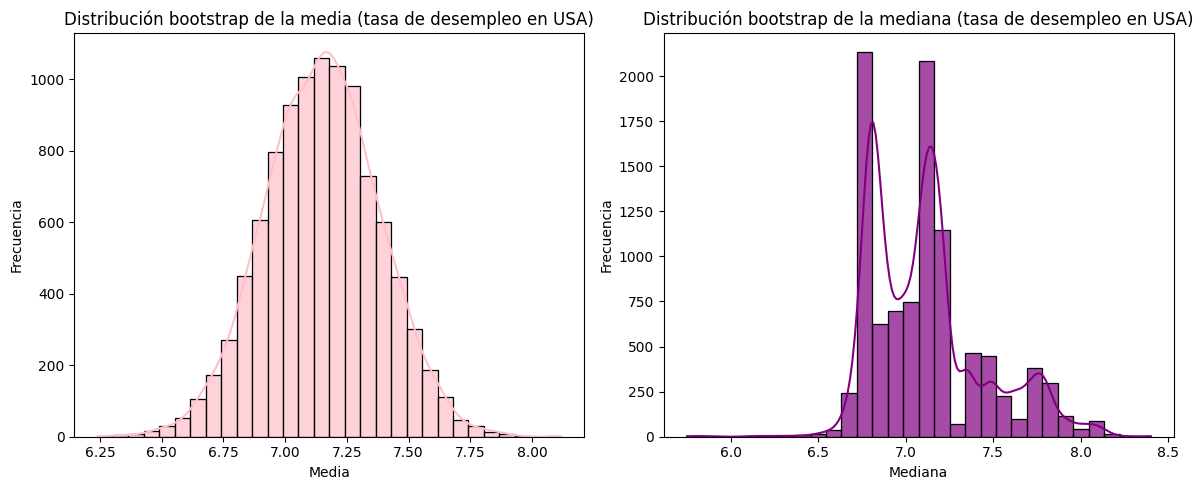

In [ ]:
# Graficar distribuciones de la media y mediana del Bootstrap
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Distribución de medias
sns.histplot(bootstrap_medias, bins=30, kde=True, ax=axes[0], color="pink", alpha=0.7)
axes[0].set_title("Distribución bootstrap de la media (tasa de desempleo en USA)")
axes[0].set_xlabel("Media")
axes[0].set_ylabel("Frecuencia")

# Distribución de medianas
sns.histplot(bootstrap_medianas, bins=30, kde=True, ax=axes[1], color="purple", alpha=0.7)
axes[1].set_title("Distribución bootstrap de la mediana (tasa de desempleo en USA)")
axes[1].set_xlabel("Mediana")
axes[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()